# Final Project 

Fist you can download the dataset from: https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset 

After obtaining the archive.zip file we will work with the data contained in TrafficTwoMonth.csv. You can extract this csv files into your working directory for the purpose of this project. You can safely ignore the other files in the folder. 


## Summary Statistics and Visualizing Data

In [46]:
import pandas as pd

dataset = pd.read_csv("TrafficTwoMonth.csv")
print(dataset)

             Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0     12:00:00 AM    10         Tuesday        13          2         2   
1     12:15:00 AM    10         Tuesday        14          1         1   
2     12:30:00 AM    10         Tuesday        10          2         2   
3     12:45:00 AM    10         Tuesday        10          2         2   
4      1:00:00 AM    10         Tuesday        11          2         1   
...           ...   ...             ...       ...        ...       ...   
5947  10:45:00 PM     9        Thursday        16          3         1   
5948  11:00:00 PM     9        Thursday        11          0         1   
5949  11:15:00 PM     9        Thursday        15          4         1   
5950  11:30:00 PM     9        Thursday        16          5         0   
5951  11:45:00 PM     9        Thursday        14          3         1   

      TruckCount  Total Traffic Situation  
0             24     41            normal  
1             36     52

For the summary statistics we will use all the variables that have numeric values, in this case: CarCount, BikeCount, BusCount, TruckCount, and total. 

In [47]:
import statistics
print(f"Car Count mean = {dataset["CarCount"].mean()}")
print(f"Car Count median = {dataset["CarCount"].median()}")
print(f"Car Count standard deviation = {dataset["CarCount"].std()}")
print(f"Car Count mode = {statistics.mode(dataset["CarCount"])}")

Car Count mean = 65.44069220430107
Car Count median = 62.0
Car Count standard deviation = 44.74933464863171
Car Count mode = 15


In [48]:
import statistics
print(f"Bike Count mean = {dataset["BikeCount"].mean()}")
print(f"Bike Count median = {dataset["BikeCount"].median()}")
print(f"Bike Count standard deviation = {dataset["BikeCount"].std()}")
print(f"Bike Count mode = {statistics.mode(dataset["BikeCount"])}")

Bike Count mean = 12.161458333333334
Bike Count median = 9.0
Bike Count standard deviation = 11.537944083702843
Bike Count mode = 1


In [49]:
import statistics
print(f"Bus Count mean = {dataset["BusCount"].mean()}")
print(f"Bus Count median = {dataset["BusCount"].median()}")
print(f"Bus Count standard deviation = {dataset["BusCount"].std()}")
print(f"Bus Count mode = {statistics.mode(dataset["BusCount"])}")

Bus Count mean = 12.912970430107526
Bus Count median = 10.0
Bus Count standard deviation = 12.497735763222304
Bus Count mode = 0


In [50]:
import statistics
print(f"Truck Count mean = {dataset["TruckCount"].mean()}")
print(f"Truck Count median = {dataset["TruckCount"].median()}")
print(f"Truck Count standard deviation = {dataset["TruckCount"].std()}")
print(f"Truck Count mode = {statistics.mode(dataset["TruckCount"])}")

Truck Count mean = 18.646337365591396
Truck Count median = 18.0
Truck Count standard deviation = 10.973138557977123
Truck Count mode = 5


In [51]:
import statistics
print(f"Total mean = {dataset["Total"].mean()}")
print(f"Total median = {dataset["Total"].median()}")
print(f"Total standard deviation = {dataset["Total"].std()}")
print(f"Total mode = {statistics.mode(dataset["Total"])}")

Total mean = 109.16145833333333
Total median = 104.0
Total standard deviation = 55.99631178071879
Total mode = 46


Now we will visualize our data obtained using line graphs, scatterplots, bar graphs, and pie charts to illustrate percentages within our data set. 

* For our line graph we are going to use Total vs Day of the week
* scatterplots to examine relationships between pairs of variables: Car Count vs Bus Count
* bar graphs
* pie charts to illustrate percentages within our data set

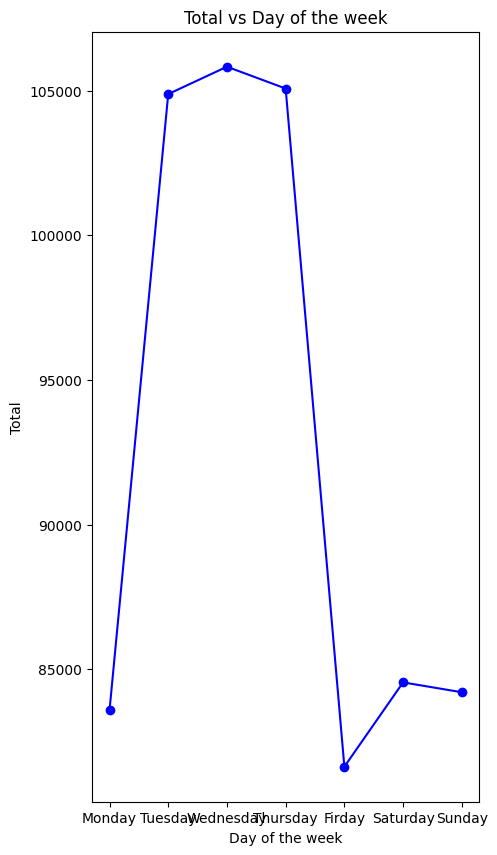

In [52]:
from matplotlib import pyplot as plt
from calendar import day_name

#we have to aggregate the column 'Total' by the column 'Day of the week'. Then we created a data frame with all the total aggregated with the day of the week and the a vector order. with this table w ecan visualize the total vehicles by th day of the week 

dayWeek = dataset.groupby(['Day of the week'],).Total.sum()

m = ["Firday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]

order = [5, 1, 6, 7, 4, 2, 3]

table1 = pd.DataFrame({'dayWeek': m, 'total': dayWeek, 'order': order})

table1 = table1.sort_values(['order'])

plt.plot(table1['dayWeek'], table1['total'], marker='o', linestyle='-', color='b')
plt.title('Total vs Day of the week')

# add a label to the y-axis
plt.ylabel('Total')

# add a label to the x-axis
plt.xlabel('Day of the week')

plt.show()


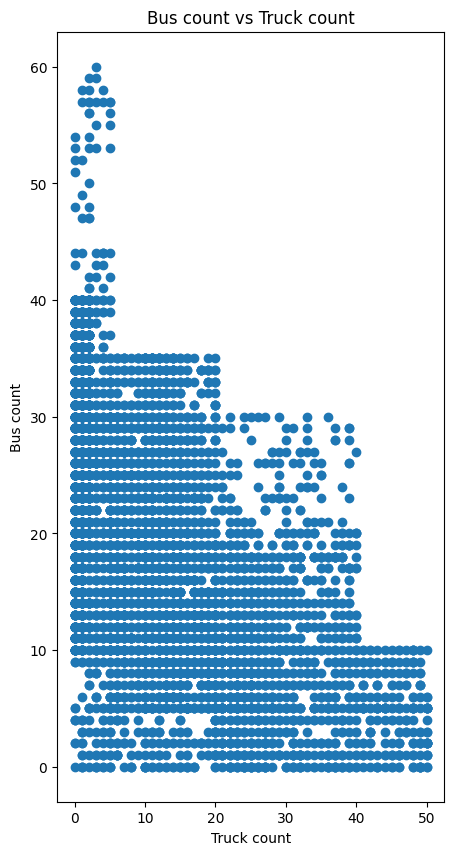

In [53]:
plt.rcParams["figure.figsize"] = (5,10)
plt.scatter(dataset['BusCount'], dataset['TruckCount'])
plt.title('Bus count vs Truck count')
plt.ylabel('Bus count')
plt.xlabel('Truck count')
plt.show()

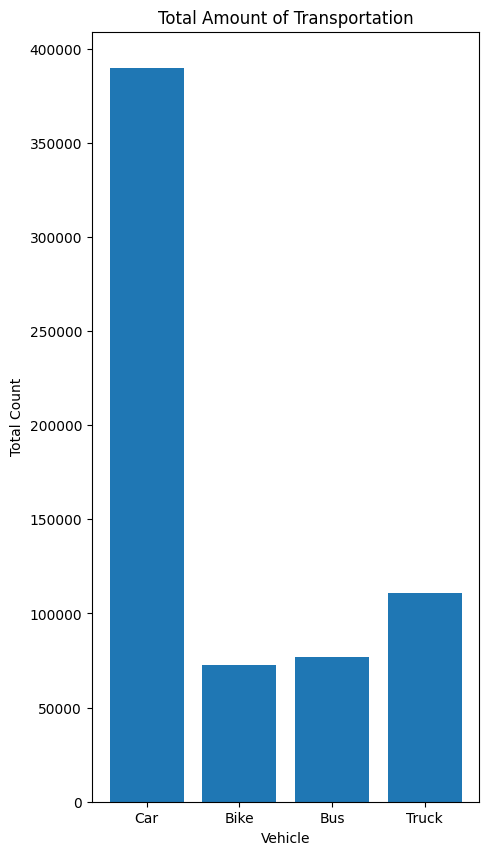

In [54]:
v = [dataset['CarCount'].sum(), dataset['BikeCount'].sum(), dataset['BusCount'].sum(), dataset['TruckCount'].sum()]

label = ['Car', 'Bike', 'Bus', 'Truck']

fig, ax = plt.subplots()

ax.bar(label, v)

ax.set_title("Total Amount of Transportation")    
ax.set_ylabel("Total Count")  
ax.set_xlabel("Vehicle")
plt.show()

/var/folders/hq/brzmwrtj01z8byykr7byl18r0000gn/T/ipykernel_20818/548499877.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [traffic_counts.get(label, 0) for label in [1, 2, 3, 4]]


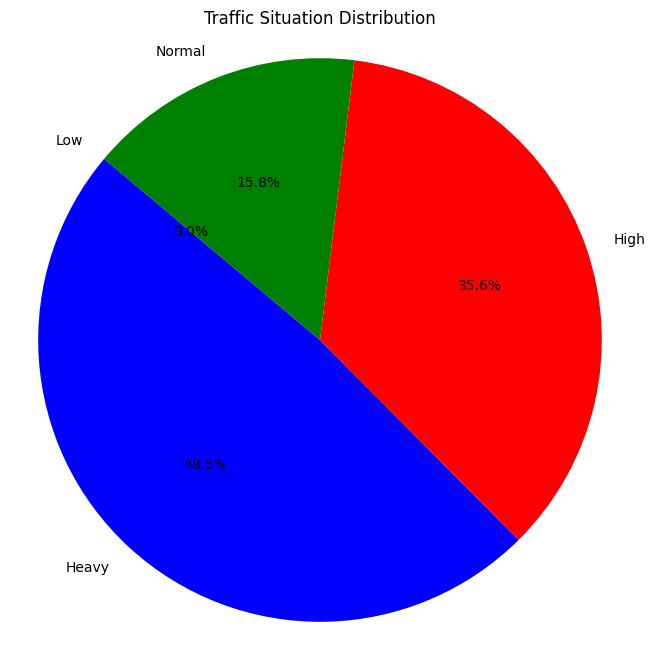

In [36]:
#Traffic situation: which kind of traffic is common 

from matplotlib import pyplot as plt

traffic_counts = dataset['Traffic Situation'].value_counts()

labels = ['Heavy', 'High', 'Normal', 'Low']

sizes = [traffic_counts.get(label, 0) for label in [1, 2, 3, 4]]

colors = ['blue', 'red', 'green', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Traffic Situation Distribution')
plt.axis('equal')
plt.show()

## Model #1: KNN 

Goal: Predicitions on Traffic Situation 

In [68]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset[["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"]]
y = dataset["Traffic Situation"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Model Prediction on Training Data\n")
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.confusion_matrix(y_train, y_train_pred))
print()


print("\nModel Prediction on Testing Data\n")
print(metrics.classification_report(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))

Model Prediction on Training Data

              precision    recall  f1-score   support

       heavy       0.98      0.99      0.99       918
        high       0.94      0.92      0.93       301
         low       0.97      0.97      0.97       672
      normal       0.98      0.98      0.98      2870

    accuracy                           0.98      4761
   macro avg       0.97      0.97      0.97      4761
weighted avg       0.98      0.98      0.98      4761

[[ 912    2    0    4]
 [   2  277    0   22]
 [   1    0  649   22]
 [  12   16   17 2825]]


Model Prediction on Testing Data

              precision    recall  f1-score   support

       heavy       0.97      1.00      0.98       219
        high       0.90      0.86      0.88        70
         low       0.94      0.93      0.93       162
      normal       0.98      0.97      0.97       740

    accuracy                           0.96      1191
   macro avg       0.94      0.94      0.94      1191
weighted avg       0.

The high accuracy, precision, recall, and F1-scores suggest that the KNN model fits well to the training data. The small discrepancies in the confusion matrix further support this. The slightly lower scores on the testing data indicate a slight drop in performance when generalizing to new data, which is expected. However, the drop is minimal, and the model still performs well with an overall accuracy of 96%. The KNN model is highly effective in predicting traffic situations with high accuracy, precision, recall, and F1-scores. The model generalizes well to unseen data, maintaining high performance on the testing set.

## Model #2: Linear Regression

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Car Count")

file_path = '/Users/atheeka/Downloads/archive/TrafficTwoMonth.csv'
try:
    traffic_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")
 
if 'traffic_data' in locals():
    X = traffic_data[['BikeCount', 'BusCount', 'TruckCount']]  
    y = traffic_data['CarCount']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
else:
    print("Data loading failed. Please check the file path and try again.")

Car Count
Mean Squared Error: 773.4960820927901
R^2 Score: 0.6096174417740325


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Bike Count")

file_path = '/Users/atheeka/Downloads/archive/TrafficTwoMonth.csv'
try:
    traffic_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")

if 'traffic_data' in locals():
    X = traffic_data[['CarCount', 'BusCount', 'TruckCount']]  
    y = traffic_data['BikeCount']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
else:
    print("Data loading failed. Please check the file path and try again.")

Bike Count
Mean Squared Error: 55.28250033947661
R^2 Score: 0.5672281933266616


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Bus Count")

file_path = '/Users/atheeka/Downloads/archive/TrafficTwoMonth.csv'
try:
    traffic_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")

if 'traffic_data' in locals():
    X = traffic_data[['CarCount', 'BikeCount', 'TruckCount']]  
    y = traffic_data['BusCount']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
else:
    print("Data loading failed. Please check the file path and try again.")

Bus Count
Mean Squared Error: 83.626215042942
R^2 Score: 0.4823896162615936


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Truck Count")

file_path = '/Users/atheeka/Downloads/archive/TrafficTwoMonth.csv'
try:
    traffic_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")
    
if 'traffic_data' in locals():
    X = traffic_data[['CarCount', 'BikeCount', 'BusCount']]  
    y = traffic_data['TruckCount']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
else:
    print("Data loading failed. Please check the file path and try again.")

Truck Count
Mean Squared Error: 64.82608271774322
R^2 Score: 0.46041076574673445


Our evaluation metrics show the following: The CarCount coefficient suggests that for each additional car, there is a small increase in the traffic variable, holding other factors constant. BikeCount is similar to cars, each additional bike slightly increases the traffic variable.
BusCount shows that buses have a more substantial impact on traffic, with each additional bus contributing more to the traffic variable compared to cars and bikes. TruckCount shows that trucks have the largest impact on the traffic variable per unit, indicating that each additional truck significantly increases the traffic variable more than cars, bikes, and buses.

The R² values indicate that only a little over half of the variation in the x-variables is captured by the model. This is consistent for both training and testing datasets, suggesting that while the model does capture some of the patterns in the data, a significant portion of the variability remains unexplained. The linear regression model provides insights into how different types of vehicles impact the traffic variable, with BusCount and TruckCount having the most substantial effects

## Model #3: Decision Tree

Goal: Categorize the traffic conditions based on all vehicle counts.

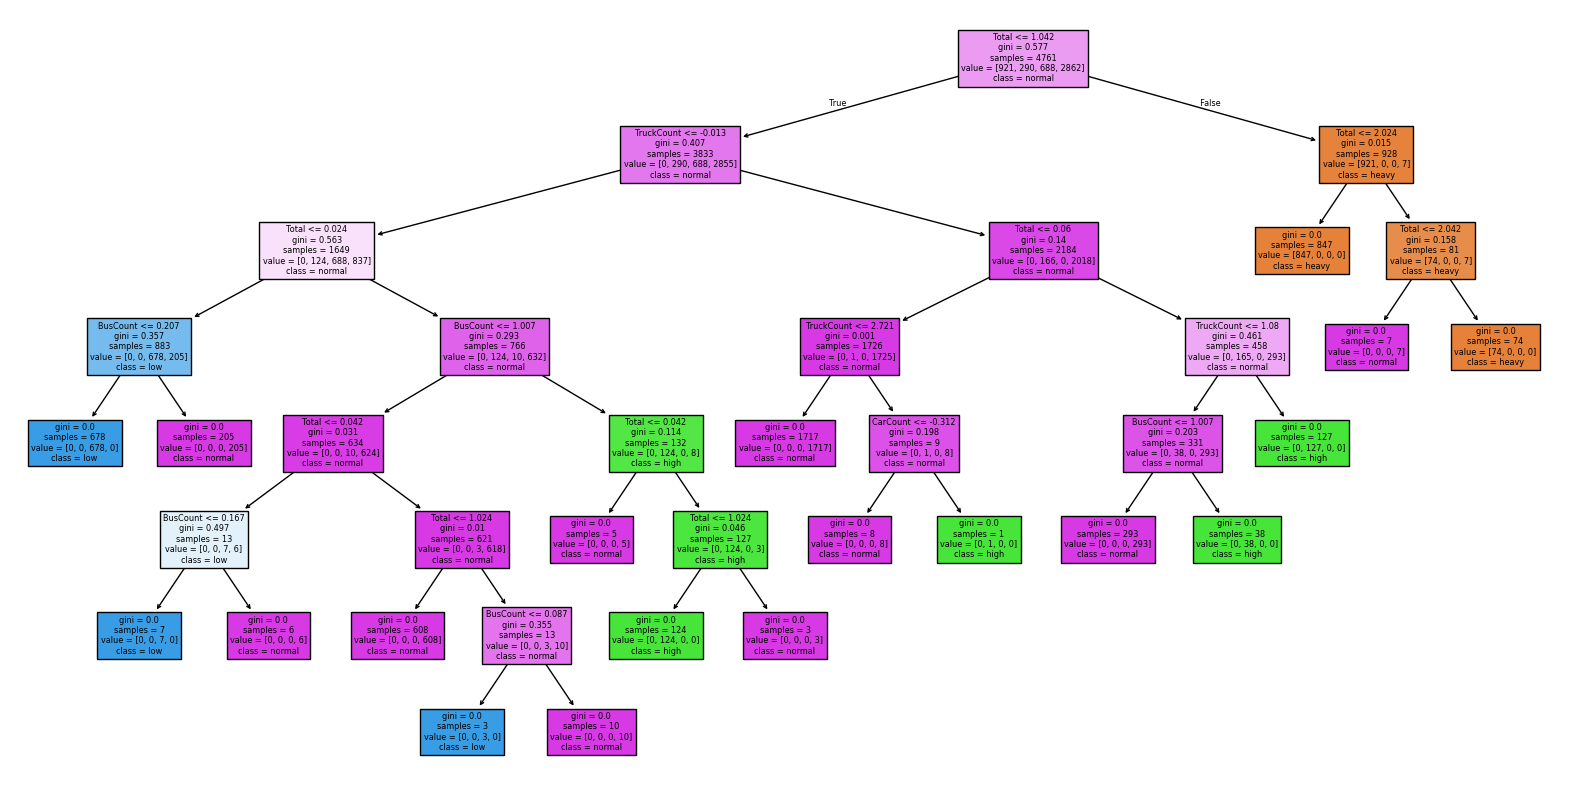

Training:

              precision    recall  f1-score   support

       heavy       1.00      1.00      1.00       921
        high       1.00      1.00      1.00       290
         low       1.00      1.00      1.00       688
      normal       1.00      1.00      1.00      2862

    accuracy                           1.00      4761
   macro avg       1.00      1.00      1.00      4761
weighted avg       1.00      1.00      1.00      4761


Testing:

              precision    recall  f1-score   support

       heavy       1.00      1.00      1.00       216
        high       0.99      0.99      0.99        81
         low       1.00      1.00      1.00       146
      normal       1.00      1.00      1.00       748

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191



In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

XDT = dataset[["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"]]

yDT = dataset["Traffic Situation"]

scalerDT = StandardScaler()
XDT_scaled = scalerDT.fit_transform(XDT)

XDT_train, XDT_test, yDT_train, yDT_test = train_test_split(XDT_scaled, yDT, test_size=0.2, random_state=42)

modelDT = DecisionTreeClassifier(random_state=42)
modelDT.fit(XDT_train, yDT_train)

plt.figure(figsize=(20, 10))
plot_tree(modelDT, filled=True, feature_names=XDT.columns, class_names=modelDT.classes_)
plt.show()

yDT_train_pred = modelDT.predict(XDT_train)
yDT_test_pred = modelDT.predict(XDT_test)


print("Training:\n")
print(classification_report(yDT_train, yDT_train_pred))
print("\nTesting:\n")
print(classification_report(yDT_test, yDT_test_pred))


The Decision Tree model, which is intended to classify traffic situations based on parameters such as car count, bike count, bus count, truck count, and total, performs admirably. It obtains a perfect 1.00 (100%) accuracy on the training set, suggesting that the model learns the training data very effectively. All classes have ideal accuracy, recall, and F1-scores, indicating error-free identification of all cases. Similarly, the testing measures show an accuracy of 1.00 (100%), with near-perfect precision, recall, and F1 scores for all classes, showing outstanding generalization to new, previously unknown data. However, the scores on the training data raise worries about potential overfitting, hurting its generalization capabilities. The Decision Tree model's strong performance on both training and testing sets demonstrates that it is durable and successfully captures the underlying patterns in the data.

## Model #4: Random Forest

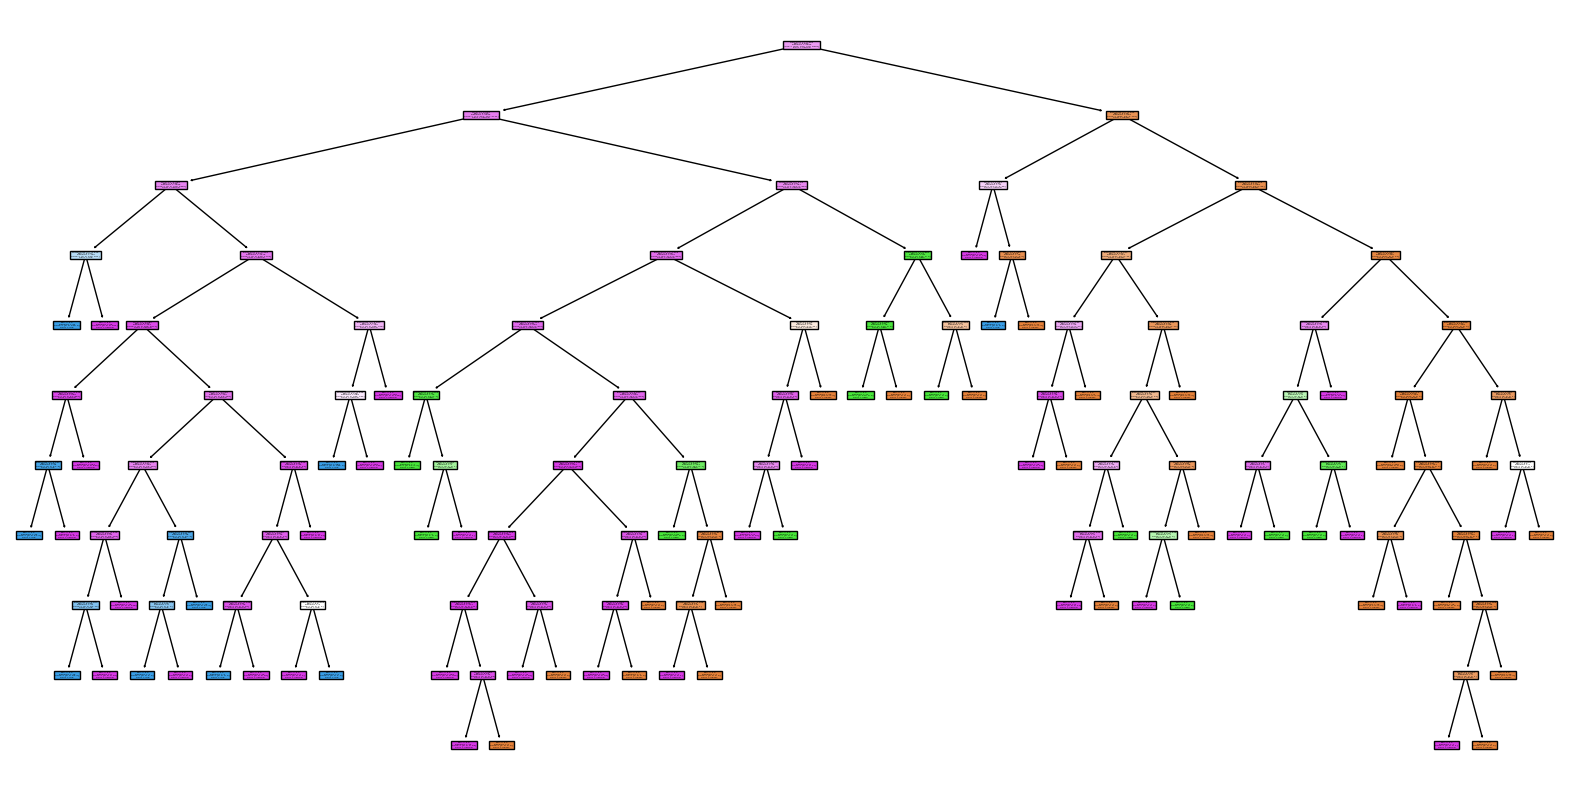

Training:

              precision    recall  f1-score   support

       heavy       1.00      1.00      1.00       921
        high       1.00      1.00      1.00       290
         low       1.00      1.00      1.00       688
      normal       1.00      1.00      1.00      2862

    accuracy                           1.00      4761
   macro avg       1.00      1.00      1.00      4761
weighted avg       1.00      1.00      1.00      4761


Testing:

              precision    recall  f1-score   support

       heavy       1.00      1.00      1.00       216
        high       0.99      0.99      0.99        81
         low       1.00      1.00      1.00       146
      normal       1.00      1.00      1.00       748

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191



In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

file_path = '/Users/atheeka/Downloads/archive/TrafficTwoMonth.csv'
dataset = pd.read_csv(file_path)

XDT = dataset[["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"]]
yDT = dataset["Traffic Situation"]

scalerDT = StandardScaler()
XDT_scaled = scalerDT.fit_transform(XDT)

XDT_train, XDT_test, yDT_train, yDT_test = train_test_split(XDT_scaled, yDT, test_size=0.2, random_state=42)

modelDT = RandomForestClassifier(random_state=42)
modelDT.fit(XDT_train, yDT_train)

single_tree = modelDT.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=XDT.columns, class_names=modelDT.classes_)
plt.show()

yDT_train_pred = modelDT.predict(XDT_train)
yDT_test_pred = modelDT.predict(XDT_test)

print("Training:\n")
print(classification_report(yDT_train, yDT_train_pred))
print("\nTesting:\n")
print(classification_report(yDT_test, yDT_test_pred))

The result analysis reveals that the model achieves an accuracy of 1.00 (100%) on the training data, indicating it perfectly classifies all instances. This suggests potential overfitting, where the model has learned the training data, including noise and outliers, too well, potentially compromising its ability to generalize to new data. Precision, Recall, and F1-Score for all classes are also 1.00 (100%) on the training set, further supporting the likelihood of overfitting. Similarly, the testing metrics show an accuracy of 1.00 (100%), which is highly unusual and suggests that the test set may not be sufficiently challenging or might be very similar to the training set. Precision, Recall, and F1-Score for all classes on the test set are close to or equal to 1.00 (100%), indicating perfect or near-perfect predictions.